In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype=A.dtype)
    A = np.flipud(A) 
    for i, row in enumerate(A):
        a[i*w:i*w+w] = row
    return a

In [3]:
def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype=a.dtype)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w]
    return np.flipud(A)

In [4]:
def leave1n(m, n):
    k = m
    for i in range(n + 1, len(k)):
        k[i] = 0
    return k

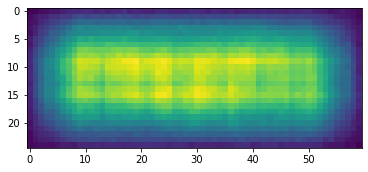

In [5]:
with np.load('/Users/markblumenau/data.npz') as data:
    A, C = data['A'], data['C']
plt.imshow(A)

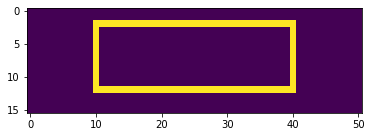

In [6]:
X = np.zeros((16,51))
X[2:12, 10] = 1
X[2:12, 40] = 1
X[2, 10:40] = 1
X[12, 10:41] = 1
plt.imshow(X)

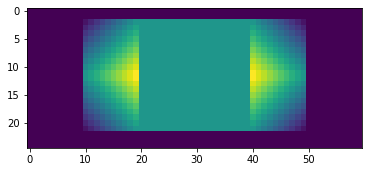

In [7]:
x = mat2vec(X)
x = C @ x
plt.imshow(vec2mat(x, (25, 60)))

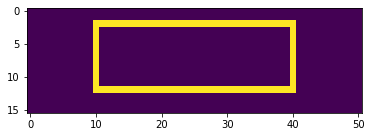

In [8]:
x_g = np.linalg.pinv(C) @ x
X_g = vec2mat(x_g, (16, 51))
plt.imshow(X_g)

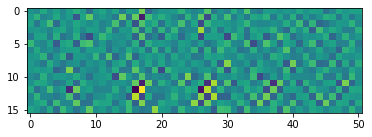

In [9]:
#Попробую нерабочий вариант (вдруг повезёт)
a = mat2vec(A)
a_g = np.linalg.pinv(C) @ a
plt.imshow(vec2mat(a_g, (16, 51)))

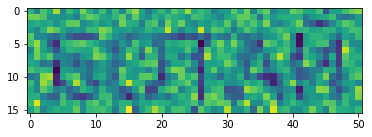

In [10]:
u, s, vh = np.linalg.svd(C)
#s has 816 elements, I have a wild guess
si = np.zeros(C.shape)
s = leave1n(s, 444)
for i in range(len(s)):
    si[i, i] = s[i]
Cn = u @ si @ vh
a_g = np.linalg.pinv(Cn) @ a
plt.imshow(vec2mat(a_g, (16, 51)))

Да ботаю я, ботаю, честно....